In [20]:
# Linear Regression in Python
# m = (mean(x) * mean(y) - mean(xy)) / (mean(x)^2 - mean(x^2))
# b = y - mx
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random
style.use('ggplot')
%matplotlib inline


In [21]:
xs = np.array([i for i in range(1,7)], dtype=np.float64)
ys = np.array([5,4,6,5,6,7], dtype=np.float64)

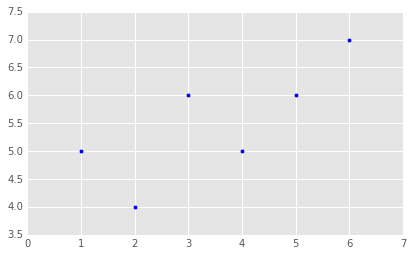

In [22]:
plt.scatter(xs,ys)
plt.show()

In [24]:
def best_fit_slope_and_intercept(xs, ys):
    m = (mean(xs) * mean(ys) - mean(xs*ys)) / (mean(xs)**2 - mean(xs**2))
    b = mean(ys) - mean(xs)*m
    return m, b

In [25]:
m, b = best_fit_slope_and_intercept(xs,ys)
print(m, b)

0.428571428571 4.0


In [26]:
regression_line = [m*x + b for x in xs]

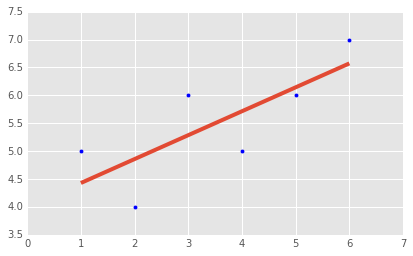

In [27]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [8]:
predict_x = 8
predict_y = m*predict_x + b

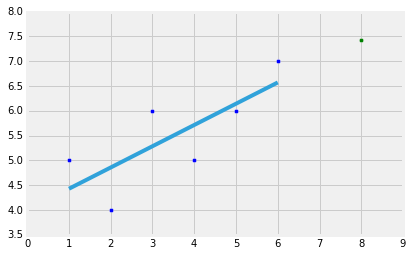

In [9]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.scatter(predict_x, predict_y,c='g')
plt.show()

In [10]:
def squared_error(ys_orig, ys_line):
    return sum((ys_line - ys_orig)**2)

In [11]:
squared_error(ys,regression_line)

2.2857142857142851

In [12]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig,ys_line)
    squared_error_y_mean = squared_error(ys_orig,y_mean_line)
    return 1 - squared_error_regr/ squared_error_y_mean
    

In [13]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.584415584416


In [14]:
def create_dataset(hm, variance, step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val += step
        elif correlation and correlation == 'neg':
            val -= step
    xs = [i for i in range(len(ys))]
    return np.array(xs,dtype=np.float64), np.array(ys,dtype=np.float64)
    

In [15]:
xs, ys = create_dataset(40,10,2,correlation='neg')

In [16]:
def best_fit_regression_line(xs,ys):
    m, b = best_fit_slope_and_intercept(xs,ys)
    return [m*x + b for x in xs]

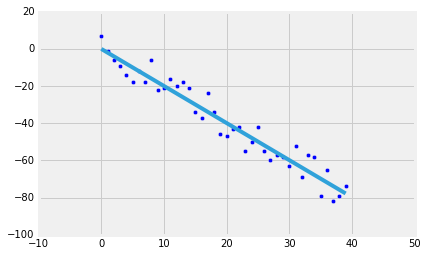

In [17]:
regression_line = best_fit_regression_line(xs,ys)
plt.plot(xs,regression_line)
plt.scatter(xs,ys)
plt.show()

In [18]:
r_squared = coefficient_of_determination(ys, regression_line)
print(r_squared)

0.935751478211
